In [11]:
import pandas as pd

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

# 설정파일 경로를 명시적으로 지정
gauth.LoadClientConfigFile('/Users/jangsunho/Desktop/test/config/client_secret.json')

# 웹 브라우저를 통한 인증
gauth.LocalWebserverAuth()

# Drive 객체 생성
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=478238330564-6pivnad3btouph2g4dqmoehjm0bqon9m.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8090%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [9]:
# 내 드라이브 루트 폴더에 있는 파일 리스트 출력
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file in file_list:
    print(f"title: {file['title']}, id: {file['id']}")

title: 2개월 수술데이터, id: 1ta-nxCsxo8yzZDeEiUdM0wHK5ok_J61QM5inxLMcrTs
title: 2개월 수술데이터.xlsx, id: 1V9LmDnIyUM3bhYetXr16kIJT9JWefljg
title: df_encoded.csv, id: 1mXJjFB9LwL89PBKQ56gqaQ_eo_ToI711
title: titanic, id: 1XWTIIOHwou5s1AsnwyMDMTa_RNTM42Bo
title: inha_데이터마이닝, id: 1g6hgpxgLspPT7NWl7iY-v7ZHY8b_GiGQ
title: 회귀분석, id: 1mDjIEaO1jnODM_rOl_5DaIPjdJGPxCuG
title: 인하대 산업경영공학과, id: 1TLkoDbfyXMIf62ktG8_xqsFV00xXxBAc
title: 제목없는 문서, id: 1tSSO6pqa7hh1jok5FvpAtpMiWF8MA1lQjfysYsv4UkA
title: 검안후기 및 라섹보강설명, id: 1qqcv93h7WsPL4dFAdWufJOICuLz32pHUmSJ_USVgX40
title: 제목없는 문서, id: 1INJrWxo9DAUScjd7vximcAI7iCspSYYWmZz-eZUqIfY
title: 상담 대본 수정, id: 1SsV5BMofDVwYDXnTmUGRKsYnDcGv4kbWRnVRp5i6j-o
title: 상담 빨리하기, id: 1bA81aM4PUnSm5dlCmAJekV1ojUfEwygXys-_yPH_14w
title: 제목없는 문서, id: 1nBtj8BfaoCfinygVuKdi5usveZMqomHuyjsiW68FDFw
title: 강건 여자보호자, id: 1D9S557fZ0ZWQvQ4-1E2PlKmL56mDf1CevzTZotak2ac
title: 스마일프로, id: 1N2-QYlO8AEJWSD4HHR2MsQ4z5jXf0--y0I7RKHcfOJM
title: Colab Notebooks, id: 1hd2dIV5RR_

In [10]:
# 폴더 ID를 기준으로 해당 폴더 안에 있는 파일들 불러오기
folder_id = '1g6hgpxgLspPT7NWl7iY-v7ZHY8b_GiGQ'
file_list = drive.ListFile({
    'q': f"'{folder_id}' in parents and trashed=false"
}).GetList()

# 결과 출력
for file in file_list:
    print(f"title: {file['title']}, id: {file['id']}, mimeType: {file['mimeType']}")


title: 기말과제데이터.xlsx, id: 1iyn0ESMEKYeDLAD41AeoKA7r7VNTrDYF, mimeType: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet
title: korea-wine.csv, id: 17htZXpTpvO5rNgG1kdiznFZz__Zbjkbc, mimeType: text/csv
title: oil_margin_csv.csv, id: 17OmiSW0j-Lm3n6kcDdsS7TiZJQC2hotU, mimeType: text/csv
title: 머신러닝 딥러닝_강의교안 2차 배포본(PDF).pdf, id: 1B5he9aDUnroPr2qiluSmqsO1p8jGLpIr, mimeType: application/pdf
title: change_csv.csv, id: 1a0IhQiRPavTeuBfW7lvleoBE42IpyQYk, mimeType: text/csv
title: 역량평가_csv, id: 1SSx7ZjFCxTXmtkpNhkx74_v73pRkLr4CK-zSnvxid-M, mimeType: application/vnd.google-apps.spreadsheet
title: .DS_Store, id: 1meTGVPIBy79QhPTR7c7M-MDbbXI8HUyY, mimeType: application/octet-stream
title: Bim_csv.csv, id: 1CDotMaPYRVvNiUd9z1J_b8h8VnrYJb2-, mimeType: text/csv
title: 역량평가_csv.csv, id: 1L6jfp0K9Iepxd9xyMkUM1vjTt1UfFrB4, mimeType: text/csv
title: pog1_csv.csv, id: 16Ku6RPNU9oLKWHropTnfG6zxGMCr_HV5, mimeType: text/csv
title: 머신러닝 딥러닝_강의교안_1차 배포본(PDF).pdf, i

In [12]:
# 파일 ID 및 파일명 지정
file_id = '1iyn0ESMEKYeDLAD41AeoKA7r7VNTrDYF'
file_name = '기말과제데이터.xlsx'

# 파일 객체 생성 후 다운로드
file = drive.CreateFile({'id': file_id})
file.GetContentFile(file_name)

# pandas로 엑셀 파일 읽기
df = pd.read_excel(file_name)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     21000 non-null  float64
 1   carbinic acidity  21000 non-null  float64
 2   citric acid       21000 non-null  float64
 3   brix              21000 non-null  float64
 4   chlorides         21000 non-null  float64
 5   chloride          21000 non-null  float64
 6   total chloride    21000 non-null  float64
 7   density           21000 non-null  float64
 8   pH                21000 non-null  float64
 9   sulfate           21000 non-null  float64
 10  alcohol           21000 non-null  float64
 11  quality           21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Corelation Heatmap')

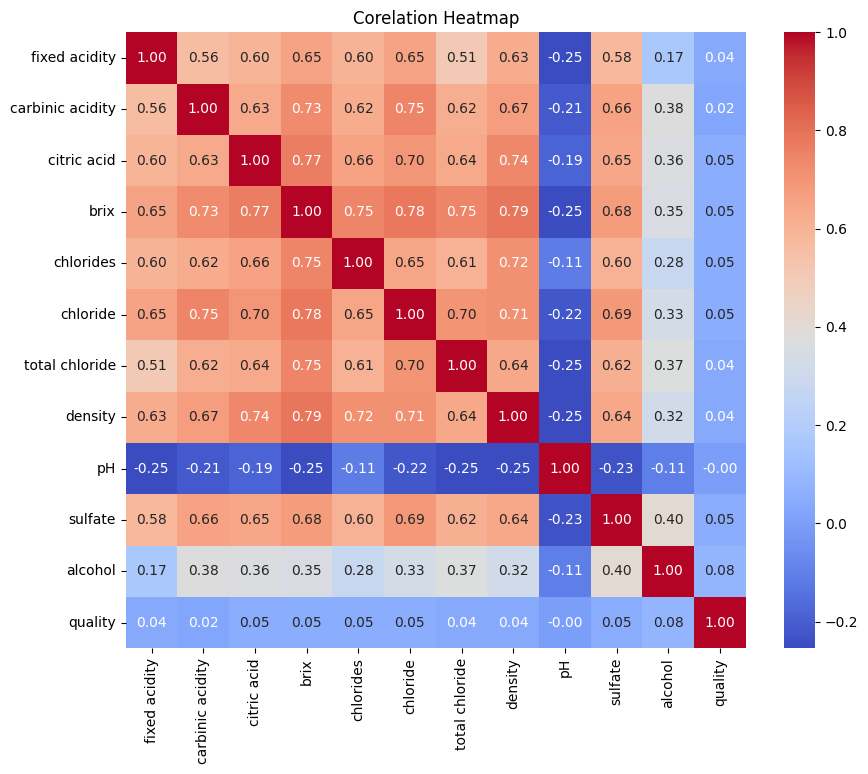

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corelation Heatmap")


In [21]:
df['target'] = (df['quality'] >= 8).astype(int)
df['target'].value_counts()

target
0    15000
1     6000
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(['target','quality'],axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

(16800, 11) (4200,)
(4200, 11) (4200,)


In [24]:
new_sample = pd.DataFrame([[
    7.8, 0.965, 0.60, 65.8, 0.074, 8.0, 160.0, 1.03898, 3.39, 0.69, 11.7
]], columns=[
    'fixed acidity', 'carbinic acidity', 'citric acid', 'brix',
    'chlorides', 'chloride', 'total chloride', 'density',
    'pH', 'sulfate', 'alcohol'
])

In [25]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성 및 학습
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

new_sample_scaled = scaler.transform(new_sample)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [26]:
display(X_train.head())
display(X_test.head())

,fixed acidity,carbinic acidity,citric acid,brix,chlorides,chloride,total chloride,density,pH,sulfate,alcohol
0,1.663519,1.526115,1.029684,0.172406,-0.195555,0.824102,0.330899,1.584536,-1.041216,0.246220,0.513258
1,-1.237116,-1.295674,-1.383555,-0.573532,-1.300625,-1.089669,-0.785388,-1.050058,-0.689575,-1.562429,0.850681
2,-0.864177,0.430275,1.418916,-0.116514,0.733344,0.594760,-0.122000,0.224933,0.130920,1.101663,1.441170
3,0.586140,1.745284,-0.215859,0.287974,-0.131493,0.932942,-0.072122,1.180554,-1.510071,1.077222,1.019392
4,1.332018,0.430275,0.458810,0.072598,1.870445,1.242617,1.142924,1.379642,0.423954,1.223869,-0.161587


,fixed acidity,carbinic acidity,citric acid,brix,chlorides,chloride,total chloride,density,pH,sulfate,alcohol
0,-0.615551,1.772680,0.666401,0.702969,-0.307664,0.690643,0.643139,-0.113516,0.423954,0.808368,-0.583365
1,-0.698426,1.032987,0.536657,0.650438,1.005608,0.917393,1.553925,0.565041,-1.275643,1.517164,1.272459
2,-1.112803,-0.336814,0.355015,0.792271,-0.692036,-0.198217,0.232139,-0.208913,1.244449,0.515074,0.260191
3,-0.201175,-0.364210,0.173374,0.540123,1.349941,0.242326,1.446187,0.935012,-0.806789,0.686162,1.188103
4,-1.154240,-1.460050,-1.435453,-1.545354,-1.220547,-1.296983,-1.373957,-1.444916,0.834202,-1.440223,-1.173854


In [27]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy    : 70.97
Model Accuracy Score : 69.69
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      2954
           1       0.43      0.06      0.11      1246

    accuracy                           0.70      4200
   macro avg       0.57      0.51      0.46      4200
weighted avg       0.62      0.70      0.61      4200



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 88.8
Model Accuracy Score  : 76.1
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2954
           1       0.61      0.56      0.58      1246

    accuracy                           0.76      4200
   macro avg       0.71      0.70      0.71      4200
weighted avg       0.76      0.76      0.76      4200



In [29]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 71.7
Model Accuracy Score  : 70.33
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      2954
           1       0.00      0.00      0.00      1246

    accuracy                           0.70      4200
   macro avg       0.35      0.50      0.41      4200
weighted avg       0.49      0.70      0.58      4200



/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', probability=True, random_state=45)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_rbf_train = round(svc.score(X_train, y_train) * 100, 2)
svc_rbf_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_rbf_train)
print("Model Accuracy Score  :",svc_rbf_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 71.72
Model Accuracy Score  : 70.33
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      2954
           1       0.00      0.00      0.00      1246

    accuracy                           0.70      4200
   macro avg       0.35      0.50      0.41      4200
weighted avg       0.49      0.70      0.58      4200



/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
param_grid = {'C': [0.1, 1], 'gamma': [1, 0.1]}

# 동일한 파라미터 그리드로 테스트
grid_search = GridSearchCV(svc, param_grid, cv=3, verbose=1, n_jobs=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.7980357142857143


In [32]:
best_svm_model = grid_search.best_estimator_
y_pred_tuned = best_svm_model.predict(X_test)

svc_rbf_pr_train = round(best_svm_model.score(X_train, y_train) * 100, 2)
svc_rbf_pr_accuracy = round(accuracy_score(y_pred_tuned, y_test) * 100, 2)

print("Training Accuracy     :",svc_rbf_pr_train)
print("Model Accuracy Score  :",svc_rbf_pr_accuracy)
print(classification_report(y_test, y_pred_tuned))

Training Accuracy     : 95.95
Model Accuracy Score  : 82.57
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      2954
           1       0.79      0.56      0.66      1246

    accuracy                           0.83      4200
   macro avg       0.81      0.75      0.77      4200
weighted avg       0.82      0.83      0.82      4200



In [33]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy    : 71.45
Model Accuracy Score : 70.24
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2954
           1       0.42      0.01      0.02      1246

    accuracy                           0.70      4200
   macro avg       0.56      0.50      0.42      4200
weighted avg       0.62      0.70      0.58      4200



In [34]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 100.0
Model Accuracy Score  : 83.62
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2954
           1       0.72      0.73      0.73      1246

    accuracy                           0.84      4200
   macro avg       0.80      0.81      0.80      4200
weighted avg       0.84      0.84      0.84      4200



In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 100.0
Model Accuracy Score  : 86.14
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2954
           1       0.90      0.60      0.72      1246

    accuracy                           0.86      4200
   macro avg       0.87      0.79      0.81      4200
weighted avg       0.87      0.86      0.85      4200



In [36]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 20],                   # 제한 없음 vs 깊이 제한 비교
    'min_samples_split': [2, 5],               # 기본값과 소폭 조정만 비교
    'min_samples_leaf': [1, 2],                # 과적합 방지에 민감한 값만
    'max_features': ['sqrt'],                  # 실무에서 자주 쓰이고 성능 우수
    'bootstrap': [True],                       # False는 매우 느리고 일반적이지 않음
    'class_weight': ['balanced']               # 클래스 불균형 대비 기본 적용
}

rf = RandomForestClassifier(random_state=45)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_rf_model = grid.best_estimator_
pred_rf = best_rf_model.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuned Random Forest Accuracy: 0.8673809523809524
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
best_rf_model = grid.best_estimator_
pred_rf = best_rf_model.predict(X_test)

random_forest_pr_train = round(best_rf_model.score(X_train, y_train) * 100, 2)
random_forest_pr_accuracy = round(accuracy_score(pred_rf, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_pr_train)
print("Model Accuracy Score  :",random_forest_pr_accuracy)
print(classification_report(y_test, pred_rf))

Training Accuracy     : 100.0
Model Accuracy Score  : 86.74
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2954
           1       0.94      0.59      0.73      1246

    accuracy                           0.87      4200
   macro avg       0.90      0.79      0.82      4200
weighted avg       0.88      0.87      0.86      4200



In [38]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100)
extra_trees.fit(X_train, y_train)
Y_pred = extra_trees.predict(X_test)
extra_trees.score(X_train, y_train)

extra_trees_train = round(extra_trees.score(X_train, y_train) * 100, 2)
extra_trees_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",extra_trees_train)
print("Model Accuracy Score  :",extra_trees_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 100.0
Model Accuracy Score  : 86.55
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2954
           1       0.94      0.59      0.72      1246

    accuracy                           0.87      4200
   macro avg       0.89      0.78      0.82      4200
weighted avg       0.88      0.87      0.85      4200



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gd_boosting = GradientBoostingClassifier(n_estimators=100)
gd_boosting.fit(X_train, y_train)
Y_pred = gd_boosting.predict(X_test)

gd_boosting_train = round(gd_boosting.score(X_train, y_train) * 100, 2)
gd_boosting_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gd_boosting_train)
print("Model Accuracy Score  :",gd_boosting_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 73.49
Model Accuracy Score  : 71.26
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2954
           1       0.69      0.06      0.11      1246

    accuracy                           0.71      4200
   macro avg       0.70      0.52      0.47      4200
weighted avg       0.71      0.71      0.61      4200



In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier
hist_gradient = HistGradientBoostingClassifier(max_iter=100)
hist_gradient.fit(X_train, y_train)
Y_pred = hist_gradient.predict(X_test)

hist_gradient_train = round(hist_gradient.score(X_train, y_train) * 100, 2)
hist_gradient_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",hist_gradient_train)
print("Model Accuracy Score  :",hist_gradient_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 83.85
Model Accuracy Score  : 75.69
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2954
           1       0.75      0.27      0.40      1246

    accuracy                           0.76      4200
   macro avg       0.76      0.62      0.62      4200
weighted avg       0.76      0.76      0.71      4200



In [43]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 94.75
Model Accuracy Score  : 81.0
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2954
           1       0.75      0.54      0.63      1246

    accuracy                           0.81      4200
   macro avg       0.79      0.73      0.75      4200
weighted avg       0.80      0.81      0.80      4200



In [44]:
params = {
    "n_estimators": 500,
    "objective": "binary:logistic",  # 이진 클래스 확률 예측
    "booster": "gbtree",
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 1,
    "gamma": 0,
    "reg_lambda": 1,  # L2 정규화
    "reg_alpha": 0,  # L1 정규화
    "seed": 42,
    "tree_method": "hist",
    "eval_metric": "logloss",  # 이진 클래스 로스
}

xgb_pa = Xgb.XGBClassifier(**params)
xgb_pa.fit(X_train,y_train)
Y_pred = xgb_pa.predict(X_test)
xgb_pa.score(X_train, y_train)

xgb_pa_train = round(xgb_pa.score(X_train, y_train) * 100, 2)
xgb_pa_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_pa_train)
print("Model Accuracy Score  :",xgb_pa_accuracy)
print(classification_report(y_test, Y_pred))

Training Accuracy     : 98.64
Model Accuracy Score  : 84.5
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2954
           1       0.80      0.64      0.71      1246

    accuracy                           0.84      4200
   macro avg       0.83      0.79      0.80      4200
weighted avg       0.84      0.84      0.84      4200



In [46]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN', 'SGDClassifier',
        'RBF SVC', 'RBF SVC Parameter', 'Linear SVC',
        'Decision Tree', 'Random Forest', 'Random Forest Parameter',
        'ExtraTreesClassifier','GradientBoosting', 'HistGradientBoosting','XGBoosting'
    ],
    'Training Accuracy': [
        log_train, knn_train, sgd_train,
        svc_rbf_train, svc_rbf_pr_train, linear_svc_train,
        decision_train, random_forest_train, random_forest_pr_train,
        extra_trees_train, gd_boosting_train, hist_gradient_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, knn_accuracy, sgd_accuracy,
        svc_rbf_accuracy, svc_rbf_pr_accuracy, linear_svc_accuracy,
        decision_accuracy, random_forest_accuracy, random_forest_pr_accuracy,
        extra_trees_accuracy, gd_boosting_accuracy, hist_gradient_accuracy, xgb_accuracy
    ]
})
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
8,Random Forest Parameter,100.00,86.74
9,ExtraTreesClassifier,100.00,86.55
7,Random Forest,100.00,86.14
6,Decision Tree,100.00,83.62
4,RBF SVC Parameter,95.95,82.57
12,XGBoosting,94.75,81.00
1,KNN,88.80,76.10
11,HistGradientBoosting,83.85,75.69
10,GradientBoosting,73.49,71.26
2,SGDClassifier,71.70,70.33


In [48]:
# 예측 확률 (각 클래스별 확률)
new_proba_rf = best_rf_model.predict_proba(new_sample_scaled)
print("RandomForest Prediction Probability:", new_proba_rf[0])

new_proba_svm = best_svm_model.predict_proba(new_sample_scaled)
print("SVM_RBF Prediction Probability:", new_proba_svm[0])

RandomForest Prediction Probability: [0.93 0.07]
SVM_RBF Prediction Probability: [0.91319141 0.08680859]


/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
